In [ ]:
!pip install opencv-python
!pip install imutils
!pip install numpy

In [ ]:
import time
import cv2
import numpy
import imutils
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow

In [ ]:
descriptor = cv2.HOGDescriptor()
descriptor.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [ ]:
def apply_non_max_suppression(coordinates):
    coordinates = numpy.array([[x, y, x + w, y + h] for (x, y, w, h) in coordinates])
    return non_max_suppression(coordinates, probs=None, overlapThresh=0.6)

In [ ]:
def detect(path: str):
    image = cv2.imread(path)
    smaller_image = imutils.resize(image, width=min(850, image.shape[1]))
    start = time.time()
    coordinates, weights = descriptor.detectMultiScale(smaller_image, winStride=(5, 7), padding=(18, 14), scale=1.2)
    coordinates = apply_non_max_suppression(coordinates)
    end = time.time()
    people = 0
    for i, (x, y, w, h) in enumerate(coordinates):
        if weights[i] > 0.2:
            cv2.rectangle(smaller_image, (x, y), (w, h),(20,58,240), 2)
            people += 1
    print(f'Number of People: {people}')
    print(f'Time of Detection: {(end - start):.4f}')
    return smaller_image

In [ ]:
def print_result(image)-> None:
    cv2_imshow(image)

Number of People: 4
Time of Detection: 1.3357


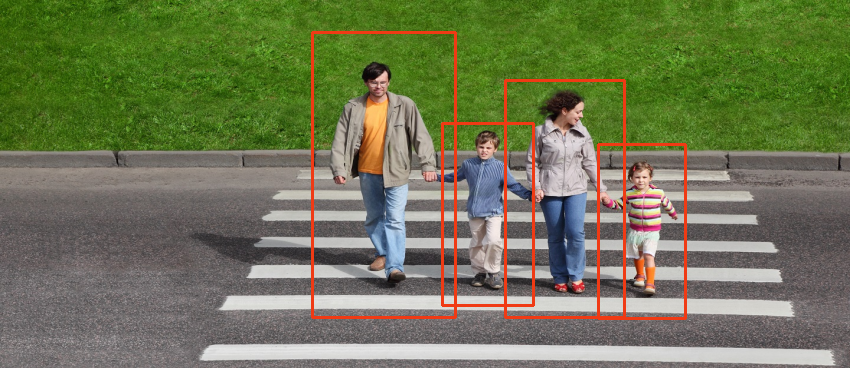

In [ ]:
print_result(detect('7.jpg'))

Number of People: 6
Time of Detection: 1.2614


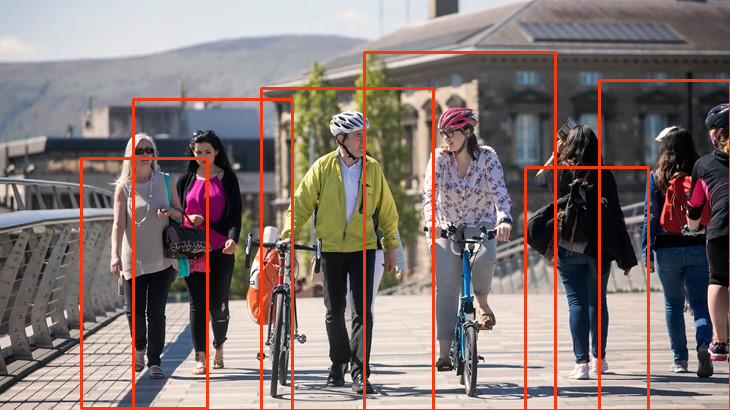

In [ ]:
print_result(detect('5.jpg'))

Number of People: 6
Time of Detection: 0.4137


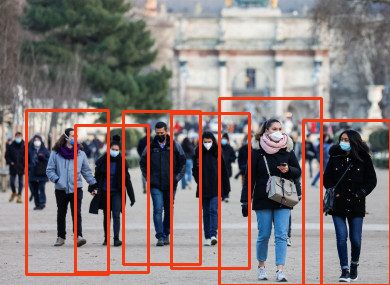

In [ ]:
print_result(detect('4.jpg'))

Number of People: 4
Time of Detection: 2.1836


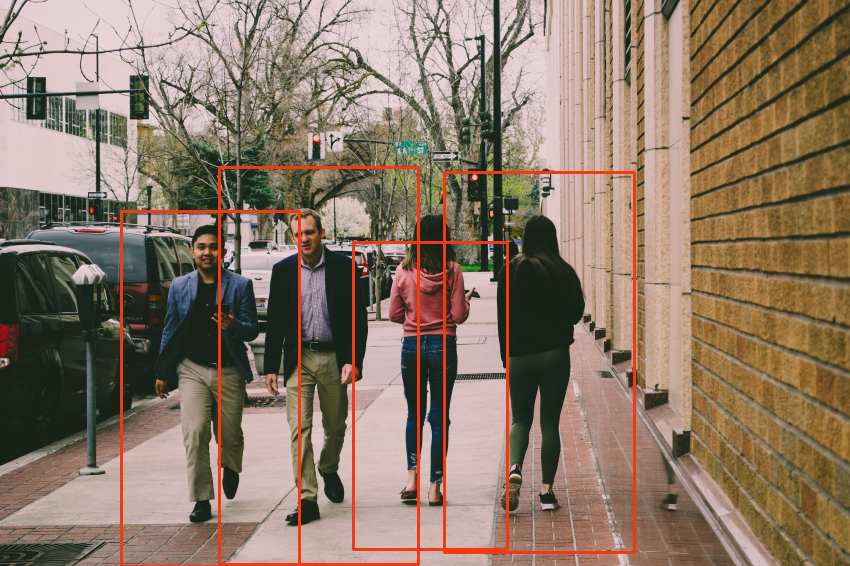

In [ ]:
print_result(detect('3.jpg'))

Number of People: 3
Time of Detection: 2.4271


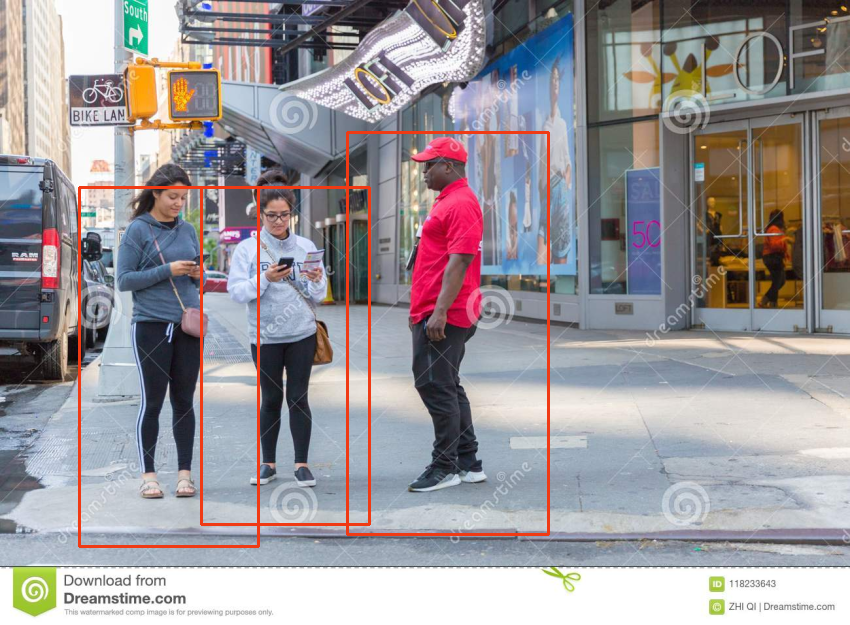

In [ ]:
print_result(detect('2.jpg'))

Number of People: 8
Time of Detection: 2.1498


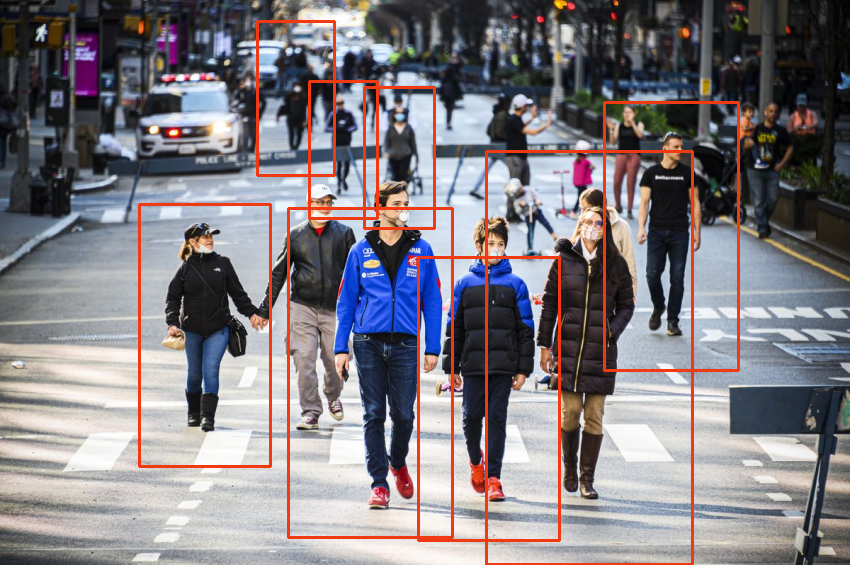

In [ ]:
print_result(detect('1.jpg'))

Number of People: 8
Time of Detection: 1.9802


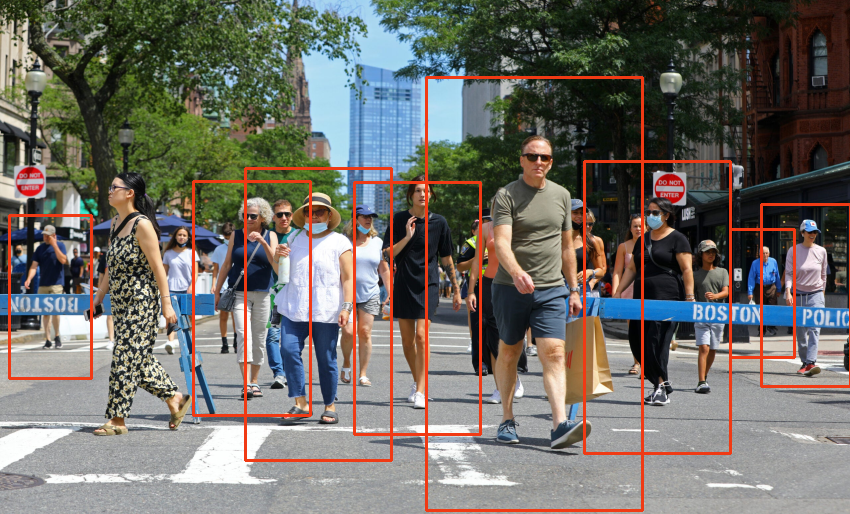

In [ ]:
print_result(detect('9.jpg'))